In [1]:
import logging
from typing import Optional
from pathlib import Path
import pandas as pd
from langchain.schema import Document
from langchain_text_splitters import TokenTextSplitter
from utils import TopicModeler

/workspace/persistent/ragsum/venv/lib/python3.10/site-packages/_distutils_hack/__init__.py:53: UserWarning: Reliance on distutils from stdlib is deprecated. Users must rely on setuptools to provide the distutils module. Avoid importing distutils or import setuptools first, and avoid setting SETUPTOOLS_USE_DISTUTILS=stdlib. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
def load_if_scraped(company_id: str) -> Optional[pd.DataFrame]:
    '''
    Transcript loader dataset based on company_id, if nothing found, returns None
    '''
    file_path = Path('..') / 'data' / f'{company_id}.csv'
    if file_path.exists():
        df = pd.read_csv(
            file_path,
            sep='\t',
            quoting=1,
            escapechar='\\',
            doublequote=True,
            quotechar='"',
        )
        logging.info('successfully loaded local transcripts')
        return df
    logging.debug('no local transcripts found')
    return None

company_id = '312932093'
df = load_if_scraped(company_id)

In [3]:
docs = [Document(page_content=doc) for doc in df.full_text.tolist()]

In [4]:
print([len(d) for d in df.full_text.tolist()])

[68818, 58668]


In [5]:
text_splitter: TokenTextSplitter = TokenTextSplitter(
    chunk_size=512, chunk_overlap=64
)

chunks = text_splitter.split_documents(docs)

docs = [chunk.page_content for chunk in chunks]

In [6]:
print([len(c) for c in docs])

[2175, 2207, 2294, 2367, 2343, 2390, 2437, 2536, 2242, 2260, 2254, 2246, 2351, 2421, 2400, 2485, 2392, 2161, 2238, 2275, 2313, 2317, 2360, 2427, 2503, 2179, 2228, 2237, 2291, 2368, 2379, 2389, 2492, 1442, 2580, 2667, 2446, 2284, 2295, 2283, 2208, 2325, 2286, 2162, 2218, 2295, 2227, 2189, 2487, 2757, 2583, 2286, 2296, 2257, 2196, 2229, 2254, 2245, 2161, 2316, 2253, 2183, 1665]


In [8]:
tm = TopicModeler(chunks=chunks , speed='learn', workers=8)
topic_words, _, topic_nums = tm.get_topics(1)

for words, tid in zip(topic_words, topic_nums):
    print(f'Topic #{tid}: ' + ', '.join(words))

2025-05-02 21:37:25,197 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/workspace/persistent/ragsum/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2025-05-02 21:37:25,305 - top2vec - INFO - Downloading all-MiniLM-L6-v2 model
INFO:top2vec:Downloading all-MiniLM-L6-v2 model
2025-05-02 21:37:26,744 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-05-02 21:37:28,536 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/workspace/persistent/ragsum/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-05-02 21:37:28,921 - t

Topic #0: domains, domain, business, customers, executives, cloud, google, our, we, just, squarespace, about, get, so, great, do, what, no, not, will, maybe, more, don, ve, is, to, learning, if, now, have, they, your, going, use, us, this, but, because, are, website, really, well, re, good, thing, how, and, would, kitchen, you


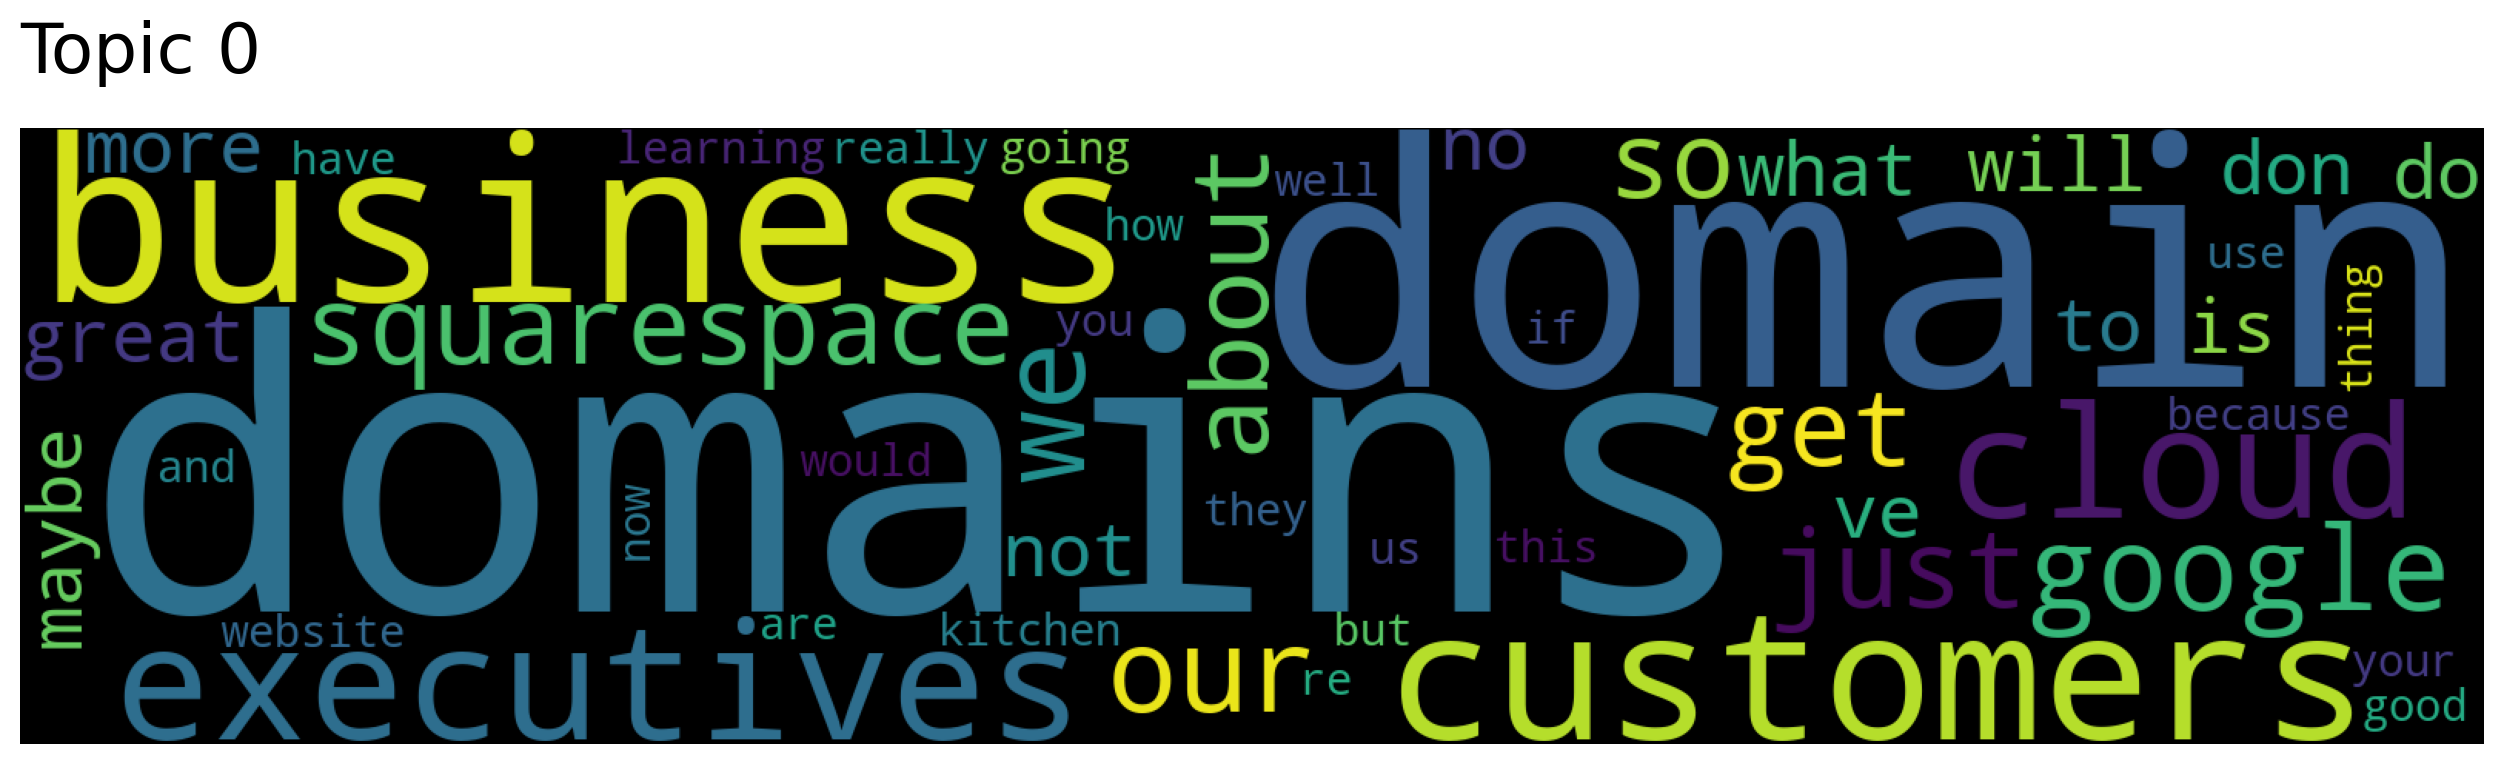

In [9]:
tm.generate_wordcloud(0)